In [11]:
from astropy.table import Table,QTable

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/')

from mass_ratio_plottingFunctions import DM_SM_hist, DM_SM_hist_std

import numpy as np

In [12]:
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/images'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
master_table = QTable.read('../master_file_vflag_10.txt', format='ascii.ecsv')

In [13]:
###############################################################################
# Remove bad galaxies
#------------------------------------------------------------------------------
bad_boolean = np.logical_or(master_table['curve_used'] == 'non', master_table['curve_used'] == 'none')

good_galaxies = master_table[np.logical_not(bad_boolean)]
###############################################################################


###############################################################################
# Split galaxies into "walls" and "voids"
#------------------------------------------------------------------------------
vboolean = good_galaxies['vflag'].data == 1
wboolean = good_galaxies['vflag'].data == 0

void_table = good_galaxies[vboolean]
wall_table = good_galaxies[wboolean]
###############################################################################


###############################################################################
# Histogram parameters
#------------------------------------------------------------------------------
hist_range = ( 0, 200)
bins = np.linspace( hist_range[0], hist_range[1], 20)
###############################################################################


###############################################################################
# Initialize table to store the number of galaxies in each bin of the 
# histogram(s).
#------------------------------------------------------------------------------
count_table = Table()

# First column is the bins
count_table['Bins'] = bins[1:]
###############################################################################

## Function to calculate shift between populations

In [14]:
def calculate_shift(void_ratios, wall_ratios, void_ratio_errors, wall_ratio_errors):
    '''
    Calculate the average shift between the void and wall populations.
    
    
    Parameters:
    ===========
    
    void_ratios : numpy array of shape (n_void,)
        Array of the mass ratios for the void galaxies
        
    wall_ratios : numpy array of shape (n_wall,)
        Array of the mass ratios for the wall galaxies
        
    void_ratio_errors : numpy array of shape (n_void,)
        Array of the errors in the mass ratios for the void galaxies
        
    wall_ratio_errors : numpy array of shape (n_wall,)
        Array of the errors in the mass ratios for the wall galaxies
    '''
    #######################################################################
    # Calculate averages, shift between voids and walls
    #----------------------------------------------------------------------
    v_mean = np.mean(void_ratios)
    w_mean = np.mean(wall_ratios)

    v_median = np.median(void_ratios)
    w_median = np.median(wall_ratios)

    mean_diff = v_mean - w_mean
    median_diff = v_median - w_median
    #######################################################################


    #######################################################################
    # Calculate uncertainties in the averages and shifts
    #----------------------------------------------------------------------
    # Preserve only finite elements for error calculation
    v_finite = void_ratio_errors[np.isfinite(void_ratio_errors)]
    w_finite = wall_ratio_errors[np.isfinite(wall_ratio_errors)]

    v_mean_err = np.sqrt(np.sum(v_finite**2))/len(v_finite)
    w_mean_err = np.sqrt(np.sum(w_finite**2))/len(w_finite)

    mean_diff_err = np.sqrt(v_mean_err**2 + w_mean_err**2)
    #######################################################################


    print('The average ratio for voids is', v_mean, 'pm', v_mean_err, 'and for walls is', w_mean, 'pm', w_mean_err)
    print('The median ratio for voids is', v_median, 'and for walls is', w_median)
    print('The average difference between the two populations is', mean_diff, 'pm', mean_diff_err)
    print('The median difference between the two populations is', median_diff)

# Histogram of ratio of dark matter halo mass to stellar mass for all galaxies

The average ratio for voids is 336.02352795797776 pm 571216548.760753 and for walls is 12803.358603644665 pm 48644902.15862754
The median ratio for voids is 8.93643638856351 and for walls is 8.925061157355227
The average difference between the two populations is -12467.335075686688 pm 573284111.1387688
The median difference between the two populations is 0.011375231208283765


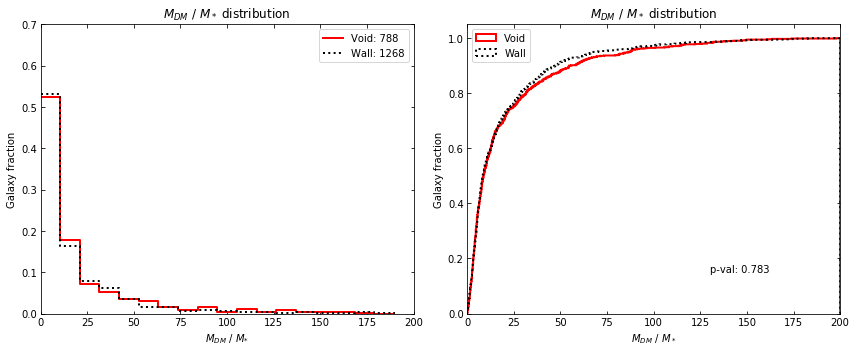

In [15]:
calculate_shift(void_table['Mdark_Mstar_ratio'], wall_table['Mdark_Mstar_ratio'], 
                void_table['Mdark_Mstar_ratio_error'], wall_table['Mdark_Mstar_ratio_error'])

DM_SM_hist(void_table['Mdark_Mstar_ratio'], wall_table['Mdark_Mstar_ratio'], bins, hist_range, 
           y_max=0.7)#, save_fig=True, FILE_SUFFIX='_all', IMAGE_DIR=IMAGE_DIR)

# Bin by absolute magnitude

### Dwarf galaxies (Mr > -17)

The average ratio for voids is 47.19828085914221 pm 144077989.619261 and for walls is 588.7146859980659 pm 1153451359.5969179
The median ratio for voids is 14.825301988346848 and for walls is 530.5311044011826
The average difference between the two populations is -541.5164051389237 pm 1162414945.7266567
The median difference between the two populations is -515.7058024128357


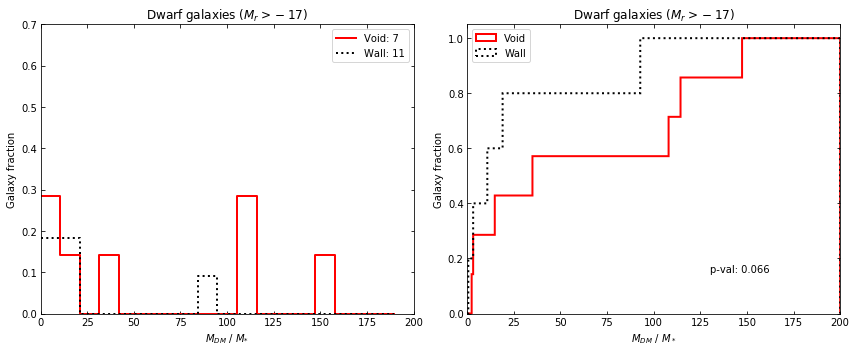

In [16]:
vboolean = void_table['rabsmag'].data >= -17
wboolean = wall_table['rabsmag'].data >= -17

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
dwarf_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
dwarf_void = void_table['Mdark_Mstar_ratio'][vboolean].data

dwarf_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
dwarf_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

dwarf_wall_table = wall_table[wboolean]
dwarf_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_dwarf'], _ = np.histogram(dwarf_void, bins)
count_table['w_dwarf'], _ = np.histogram(dwarf_wall, bins)
###########################################################################


calculate_shift(dwarf_void, dwarf_wall, dwarf_void_err, dwarf_wall_err)

DM_SM_hist(dwarf_void, dwarf_wall, bins, hist_range, y_max=0.7, 
           plot_title='Dwarf galaxies ($M_r > -17$)')#, save_fig=True, 
           #FILE_SUFFIX='_dwarf', IMAGE_DIR=IMAGE_DIR)

### Galaxies between -17 and -18 in Mr

The average ratio for voids is 70.51435350488646 pm 316493134.3023172 and for walls is 175.9752664322505 pm 152766971.88933966
The median ratio for voids is 20.305843333320453 and for walls is 19.753165495820706
The average difference between the two populations is -105.46091292736403 pm 351433708.91356295
The median difference between the two populations is 0.552677837499747


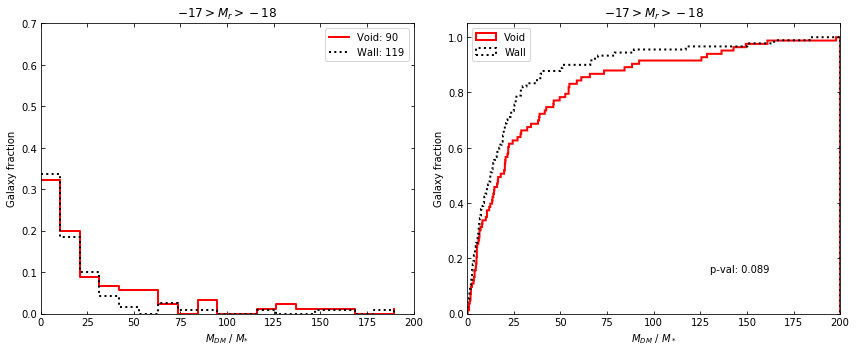

In [17]:
vboolean = np.logical_and(void_table['rabsmag'].data < -17, void_table['rabsmag'].data >= -18)
wboolean = np.logical_and(wall_table['rabsmag'].data < -17, wall_table['rabsmag'].data >= -18)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g17_18_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g17_18_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g17_18_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g17_18_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g17_18_wall_table = wall_table[wboolean]
g17_18_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_17_18'], _ = np.histogram(g17_18_void, bins)
count_table['w_17_18'], _ = np.histogram(g17_18_wall, bins)
###########################################################################


calculate_shift(g17_18_void, g17_18_wall, g17_18_void_err, g17_18_wall_err)

DM_SM_hist(g17_18_void, g17_18_wall, bins, hist_range, y_max=0.7, 
           plot_title='$-17 > M_r > -18$')#, save_fig=True, FILE_SUFFIX='_17-18', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies between -18 and -19 in Mr

The average ratio for voids is 36.064693996591835 pm 2427215658.9842424 and for walls is 91.81992855979405 pm 180226430.06253096
The median ratio for voids is 12.592658543629447 and for walls is 12.903310475275731
The average difference between the two populations is -55.755234563202215 pm 2433897578.2294936
The median difference between the two populations is -0.3106519316462837


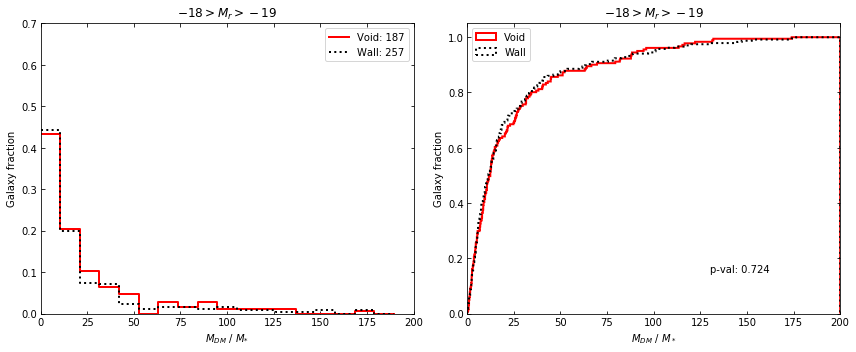

In [18]:
vboolean = np.logical_and(void_table['rabsmag'].data < -18, void_table['rabsmag'].data >= -19)
wboolean = np.logical_and(wall_table['rabsmag'].data < -18, wall_table['rabsmag'].data >= -19)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g18_19_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g18_19_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g18_19_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g18_19_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g18_19_wall_table = wall_table[wboolean]
g18_19_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_18_19'], _ = np.histogram(g18_19_void, bins)
count_table['w_18_19'], _ = np.histogram(g18_19_wall, bins)
###########################################################################


calculate_shift(g18_19_void, g18_19_wall, g18_19_void_err, g18_19_wall_err)

DM_SM_hist(g18_19_void, g18_19_wall, bins, hist_range, y_max=0.7, 
           plot_title='$-18 > M_r > -19$')#, save_fig=True, FILE_SUFFIX='_18-19', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies between -19 and -20 in Mr

The average ratio for voids is 135.0188856739933 pm 23304582.488171764 and for walls is 54642.89941027103 pm 50636311.719087265
The median ratio for voids is 7.839777069048187 and for walls is 7.781279323377825
The average difference between the two populations is -54507.880524597036 pm 55741722.51967619
The median difference between the two populations is 0.05849774567036281


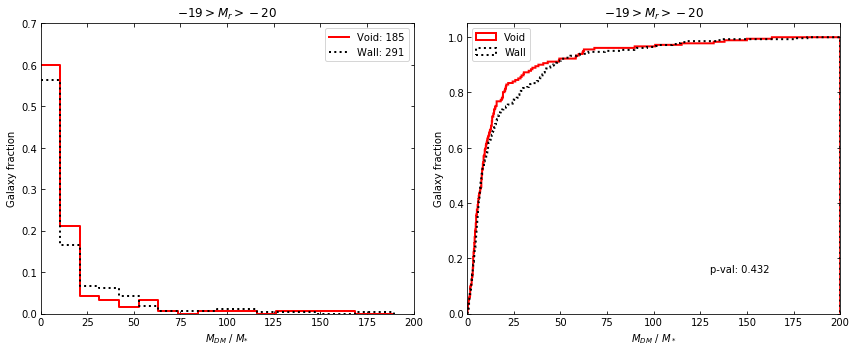

In [19]:
vboolean = np.logical_and(void_table['rabsmag'].data < -19, void_table['rabsmag'].data >= -20)
wboolean = np.logical_and(wall_table['rabsmag'].data < -19, wall_table['rabsmag'].data >= -20)

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g19_20_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g19_20_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g19_20_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g19_20_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g19_20_wall_table = wall_table[wboolean]
g19_20_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_19_20'], _ = np.histogram(g19_20_void, bins)
count_table['w_19_20'], _ = np.histogram(g19_20_wall, bins)
###########################################################################


calculate_shift(g19_20_void, g19_20_wall, g19_20_void_err, g19_20_wall_err)

DM_SM_hist(g19_20_void, g19_20_wall, bins, hist_range, y_max=0.7, 
           plot_title='$-19 > M_r > -20$')#, save_fig=True, FILE_SUFFIX='_19-20', 
           #IMAGE_DIR=IMAGE_DIR)

### Galaxies with Mr < -20

The average ratio for voids is 710.3670643569939 pm 3793518.5002185884 and for walls is 301.7069868264277 pm 53369852.00964958
The median ratio for voids is 7.04236651558924 and for walls is 7.35469114729676
The average difference between the two populations is 408.6600775305662 pm 53504503.41927676
The median difference between the two populations is -0.31232463170752034


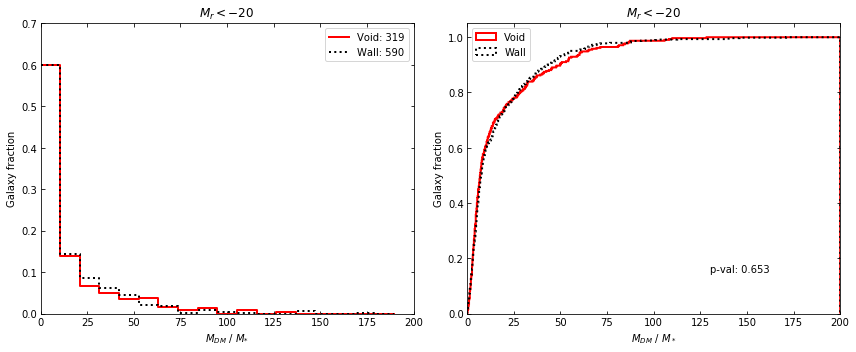

In [20]:
vboolean = void_table['rabsmag'].data < -20
wboolean = wall_table['rabsmag'].data < -20

###########################################################################
# Separate the mass ratios according to wall or void.
#--------------------------------------------------------------------------
g20_wall = wall_table['Mdark_Mstar_ratio'][wboolean].data
g20_void = void_table['Mdark_Mstar_ratio'][vboolean].data

g20_wall_err = wall_table['Mdark_Mstar_ratio_error'][wboolean].data
g20_void_err = void_table['Mdark_Mstar_ratio_error'][vboolean].data

g20_wall_table = wall_table[wboolean]
g20_void_table = void_table[vboolean]
###########################################################################


###########################################################################
# Add population counts to histogram table
#--------------------------------------------------------------------------
count_table['v_20plus'], _ = np.histogram(g20_void, bins)
count_table['w_20plus'], _ = np.histogram(g20_wall, bins)
###########################################################################


calculate_shift(g20_void, g20_wall, g20_void_err, g20_wall_err)

DM_SM_hist(g20_void, g20_wall, bins, hist_range, y_max=0.7, 
           plot_title='$M_r < -20$')#, 
           #save_fig=True, FILE_SUFFIX='_bright', IMAGE_DIR=IMAGE_DIR)

## Write histogram table to file

In [ ]:
count_table.write('histogram_counts.txt', format='ascii.commented_header')

## Statistics

In [ ]:
g20_void_table.sort('Mdark_Mstar_ratio')
g20_wall_table.sort('Mdark_Mstar_ratio')

print(sum(g20_void_table['Mdark_Mstar_ratio'] > 1E4))
print(sum(g20_wall_table['Mdark_Mstar_ratio'] > 1E4))

In [ ]:
g19_20_void_table.sort('Mdark_Mstar_ratio')
g19_20_wall_table.sort('Mdark_Mstar_ratio')

print(g19_20_void_table[g19_20_void_table['Mdark_Mstar_ratio'] > 1E4])
print(g19_20_wall_table[g19_20_wall_table['Mdark_Mstar_ratio'] > 1E4])

In [ ]:
g18_19_void_table.sort('Mdark_Mstar_ratio')
g18_19_wall_table.sort('Mdark_Mstar_ratio')

#print(sum(g18_19_void_table['Mdark_Mstar_ratio'] > 1E4))
#print(sum(g18_19_wall_table['Mdark_Mstar_ratio'] > 1E4))
print(g18_19_void_table[g18_19_void_table['Mdark_Mstar_ratio'] > 1E4])

In [ ]:
#print(sum(g17_18_void_table['Mdark_Mstar_ratio'] > 1E6))
#print(sum(g17_18_wall_table['Mdark_Mstar_ratio'] > 1E6))
g17_18_void_table[g17_18_void_table['Mdark_Mstar_ratio'] > 1E4].pprint()
g17_18_wall_table[g17_18_wall_table['Mdark_Mstar_ratio'] > 1E4].pprint()

In [ ]:
#print(sum(dwarf_void_table['Mdark_Mstar_ratio'] > 1E4))
#print(sum(dwarf_wall_table['Mdark_Mstar_ratio'] > 1E6))
dwarf_wall_table[dwarf_wall_table['Mdark_Mstar_ratio'] > 1E4].pprint()